In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import json

In [2]:
sns.set(style="whitegrid")

## Load data

### Load years 2012-2016

In [233]:
df1 = pd.DataFrame()
for year in range(2012, 2017):
    df_load = pd.read_excel('data/emission-spot-primary-market-auction-report-{}-data.xls'.format(year), skiprows=2)
    df_load.columns = df_load.columns.str.strip()
    if year != 2016:
        # Sum Time and Date to have datetime
        df_load['Time'] = pd.to_datetime(pd.to_numeric(df_load['Date']) + pd.to_numeric(df_load['Time']))

    if year == 2012:
        df_load.rename(columns={
            'Minimal Price €/tCO2': 'Minimum Bid €/tCO2',
            'Maximal Price €/tCO2': 'Maximum Bid €/tCO2'
        }, inplace=True)
    elif year == 2016:
        # Rename 'Auction\nDetails' to 'Auction Details'
        df_load.columns = df_load.columns.str.replace(r'\n', ' ', regex=True).str.strip()
        df_load.columns = df_load.columns.str.replace(r'EUR', '€', regex=True)
        df_load.rename(columns={
            'Auction Time': 'Time',
            'Auction Volume': 'Auction Volume tCO2',
            'Mean Price €/tCO2': 'Mean €/tCO2',
            'Median Price €/tCO2': 'Median €/tCO2',
            'Number of Succesful  Bidders': 'Number of Successful Bidders'
        }, inplace=True)
        df_load['Country'] = df_load['Auction Name'].str[:2]
    df1 = pd.concat([df1, df_load])
df1.reset_index(inplace=True)
df1.drop(columns=['index'], inplace=True)

In [234]:
df1 = pd.concat([
    df1.drop(columns=['Auction Details']),
    df1['Auction Details'].apply(lambda x: json.loads("{" + re.sub(r'([a-zA-Z]*):', r'"\1":', x).replace('.', '').replace('\n', ',') + "}") if isinstance(x, str) else {}).apply(pd.Series)
], axis=1)
for name in [x for x in list(df1['Auction Name'].unique()) if x not in ['EU', 'EU (TCAP)', 'XA', 'XF']]:
    df1[name] = df1[df1['Auction Name'] == name]['Auction Volume tCO2'] * df1[df1['Auction Name'] == name]['Auction Price €/tCO2']

In [235]:
df1.rename(columns={
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'EL': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden'
}, inplace=True)

In [236]:
df1.columns

Index(['Date', 'Time', 'Auction Name', 'Contract', 'Auction Price €/tCO2',
       'Minimum Bid €/tCO2', 'Maximum Bid €/tCO2', 'Mean €/tCO2',
       'Median €/tCO2', 'Auction Volume tCO2', 'Total Amount of Bids',
       'Cover Ratio', 'Total Number of Bidders',
       'Number of Successful Bidders', 'Total Revenue €', 'Country',
       'Certificate', 'Austria', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Lithuania',
       'Italy', 'Bulgaria', 'Cyprus', 'Denmark', 'Greece', 'Spain', 'Finland',
       'France', 'Hungary', 'Slovakia', 'Ireland', 'Belgium', 'Czech Republic',
       'Estonia', 'Croatia', 'Germany', 'Poland'],
      dtype='object')

### Load years 2017-2020

In [237]:
df2 = pd.DataFrame()

for year in range(2017, 2021):
    df2 = pd.concat([
        df2,
        pd.read_excel('data/emission-spot-primary-market-auction-report-{}-data.xls'.format(year), skiprows=5)
    ])

In [238]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [239]:
df2.rename(
    columns={
#         'Innovation\nFund': 'Innovation Fund',
        'Austria\n(AT)': 'Austria',
        'Belgium\n(BE)': 'Belgium',
        'Bulgaria\n(BG)': 'Bulgaria',
        'Croatia\n(HR)': 'Croatia',
        'Cyprus\n(CY)': 'Cyprus',
        'Czech Republic\n(CZ)': 'Czech Republic',
        'Denmark\n(DK)': 'Denmark',
        'Estonia\n(EE)': 'Estonia',
        'Finland\n(FI)': 'Finland',
        'France\n(FR)': 'France',
        'Germany\n(DE)': 'Germany',
        'Greece\n(EL)': 'Greece',
        'Hungary\n(HU)': 'Hungary',
        'Iceland\n(IS)': 'Iceland',
        'Ireland\n(IE)': 'Ireland',
        'Italy\n(IT)': 'Italy',
        'Latvia\n(LV)': 'Latvia',
        'Liechtenstein\n(LI)': 'Liechtenstein',
        'Lithuania\n(LT)': 'Lithuania',
        'Luxembourg\n(LU)': 'Luxembourg',
        'Malta\n(MT)': 'Malta',
        'Netherlands\n(NL)': 'Netherlands',
        'Norway\n(NO)': 'Norway',
        'Poland\n(PL)': 'Poland',
        'Portugal\n(PT)': 'Portugal',
        'Romania\n(RO)': 'Romania',
        'Slovakia\n(SK)': 'Slovakia',
        'Slovenia\n(SI)': 'Slovenia',
        'Spain\n(ES)': 'Spain',
        'Sweden\n(SE)': 'Sweden'
    },
    inplace=True
)

In [240]:
COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

### Merge dataframes

#### Check columns diff

In [241]:
df1.columns

Index(['Date', 'Time', 'Auction Name', 'Contract', 'Auction Price €/tCO2',
       'Minimum Bid €/tCO2', 'Maximum Bid €/tCO2', 'Mean €/tCO2',
       'Median €/tCO2', 'Auction Volume tCO2', 'Total Amount of Bids',
       'Cover Ratio', 'Total Number of Bidders',
       'Number of Successful Bidders', 'Total Revenue €', 'Country',
       'Certificate', 'Austria', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Lithuania',
       'Italy', 'Bulgaria', 'Cyprus', 'Denmark', 'Greece', 'Spain', 'Finland',
       'France', 'Hungary', 'Slovakia', 'Ireland', 'Belgium', 'Czech Republic',
       'Estonia', 'Croatia', 'Germany', 'Poland'],
      dtype='object')

In [242]:
df2.columns

Index(['Date', 'Time', 'Auction Name', 'Contract', 'Auction Price €/tCO2',
       'Minimum Bid €/tCO2', 'Maximum Bid €/tCO2', 'Mean €/tCO2',
       'Median €/tCO2', 'Auction Volume tCO2', 'Total Amount of Bids',
       'Number of bids submitted', 'Number of successful bids',
       'Average number of bids per bidder', 'Average bid size',
       'Average volume bid per bidder',
       'Standard deviation of bid volume per bidder',
       'Average volume won per bidder',
       'Standard deviation of volume won per bidder', 'Cover Ratio',
       'Total Number of Bidders', 'Number of Successful Bidders',
       'Total Revenue €', 'Country', 'Austria', 'Belgium', 'Bulgaria',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Iceland',
       'Li

In [243]:
np.setdiff1d(df1.columns, df2.columns)

array(['Certificate'], dtype=object)

In [244]:
np.setdiff1d(df2.columns, df1.columns)

array(['Average bid size', 'Average number of bids per bidder',
       'Average volume bid per bidder', 'Average volume won per bidder',
       'Iceland', 'Innovation\nFund', 'Liechtenstein', 'Norway',
       'Number of bids submitted', 'Number of successful bids',
       'Standard deviation of bid volume per bidder',
       'Standard deviation of volume won per bidder'], dtype=object)

#### Merge

In [245]:
df = pd.concat([df1, df2]).reset_index()
df.drop(columns=['index'], inplace=True)

In [273]:
df.head()

,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Auction Volume tCO2,...,Malta (volume),Netherlands (volume),Norway (volume),Poland (volume),Portugal (volume),Romania (volume),Slovakia (volume),Slovenia (volume),Spain (volume),Sweden (volume)
0,2012-12-18,2012-12-18 15:00:38,EU,T3PA,6.45,4.80,8.00,6.32,6.37,5584500,...,13000.0,NaN,NaN,NaN,232000.0,538000.0,165000.0,50000.0,925000.0,96000.0
1,2012-12-17,2012-12-17 15:00:30,HU,T2PA,6.29,6.16,6.45,6.29,6.29,1250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-12-14,2012-12-14 11:00:31,DE,T3PA,6.57,6.30,6.70,6.50,6.51,2531000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-12-13,2012-12-13 15:00:38,EU,T3PA,6.55,6.00,6.85,6.51,6.53,5515500,...,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0
4,2012-12-11,2012-12-11 15:00:45,EU,T3PA,6.91,4.50,7.25,6.86,6.91,5515500,...,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0


#### Export for other notebooks

In [274]:
df.to_csv('data/concatenated-auctions.csv')

### Check that country columns are in euros (sum all countries for each auction and check equality with column `Total Revenue €`)

In [276]:
pd.DataFrame(df[COUNTRIES] \
.sum(axis=1)) \
.reset_index() \
.merge(pd.DataFrame(df['Total Revenue €'].reset_index()), left_index=True, right_index=True)

,index_x,0,index_y,Total Revenue €
0,0,31953300.0,0,36020025.0
1,1,7862500.0,1,7862500.0
2,2,16628670.0,2,16628670.0
3,3,31410525.0,3,36126525.0
4,4,33136905.0,4,38112105.0
...,...,...,...,...
1599,1599,64513450.0,1599,64513450.0
1600,1600,65301525.0,1600,65301525.0
1601,1601,57846240.0,1601,57846240.0
1602,1602,65247175.0,1602,65247175.0


### Convert country revenue to volume

In [248]:
for country in COUNTRIES:
    df['{} (volume)'.format(country)] = df[country] / df['Auction Price €/tCO2']

### Check that country volumes sum up to `Auction Volume tCO2`

In [249]:
pd.DataFrame(df[list(map(lambda x: '{} (volume)'.format(x), COUNTRIES))] \
.sum(axis=1)) \
.reset_index() \
.merge(pd.DataFrame(df['Auction Volume tCO2'].reset_index()), left_index=True, right_index=True)

,index_x,0,index_y,Auction Volume tCO2
0,0,4954000.0,0,5584500
1,1,1250000.0,1,1250000
2,2,2531000.0,2,2531000
3,3,4795500.0,3,5515500
4,4,4795500.0,4,5515500
...,...,...,...,...
1599,1599,2717500.0,1599,2717500
1600,1600,2717500.0,1600,2717500
1601,1601,2363000.0,1601,2363000
1602,1602,2717500.0,1602,2717500


### Country volume

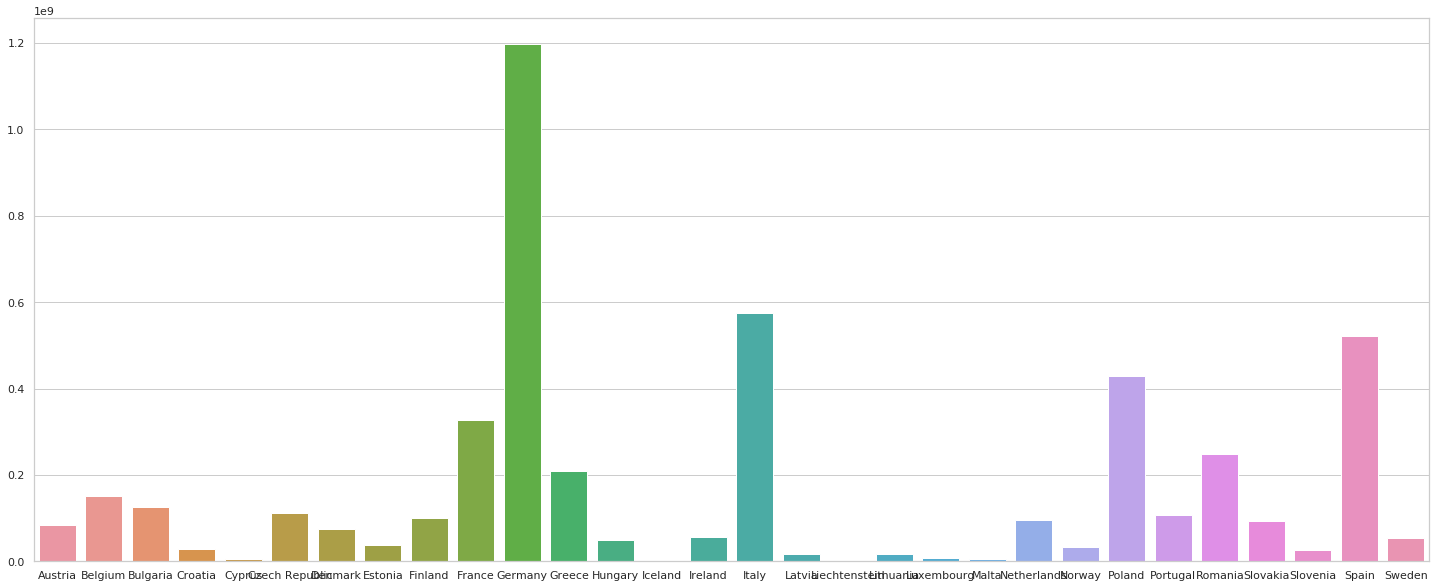

In [250]:
plt.figure(figsize=(25,10))
sns.barplot(x=COUNTRIES, y=[df['{} (volume)'.format(country)].sum() for country in COUNTRIES])

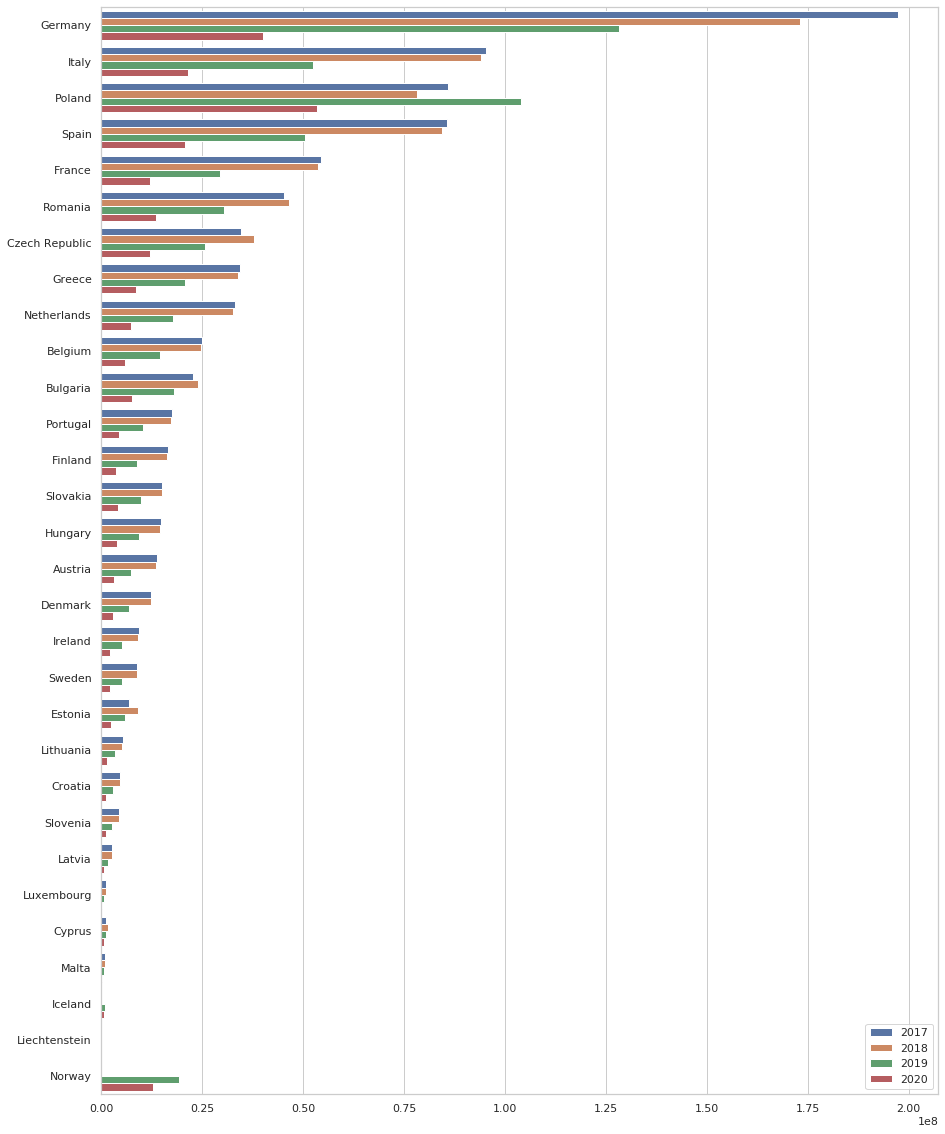

In [251]:
plt.figure(figsize=(15,20))
sns.barplot(
    y=[country for year in YEARS for country in COUNTRIES],
    x=[df[df['Time'].dt.year == int(year)]['{} (volume)'.format(country)].sum() for year in YEARS for country in COUNTRIES],
    hue=[year for year in YEARS for country in COUNTRIES],
    order=list(map(lambda x: x['country'],
                   sorted([{"s": df[df['Time'].dt.year == 2017]['{} (volume)'.format(country)].sum(), "country": country} for country in COUNTRIES], key=lambda x: x['s'], reverse=True)))
)

### Explore columns with meaningful info

In [252]:
df[[
#     'Auction Name',
    'Auction Price €/tCO2',
    'Auction Volume tCO2',
    'Average bid size',
    'Average number of bids per bidder',
    'Average volume bid per bidder',
    'Average volume won per bidder',
#     'Contract',
#     'Country',
    'Cover Ratio',
#     'Date',
    'Maximum Bid €/tCO2',
    'Mean €/tCO2',
    'Median €/tCO2',
    'Minimum Bid €/tCO2',
    'Number of Successful Bidders',
    'Number of bids submitted',
    'Number of successful bids',
    'Standard deviation of bid volume per bidder',
    'Standard deviation of volume won per bidder',
#     'Time',
    'Total Amount of Bids',
    'Total Number of Bidders',
    'Total Revenue €'
]].head()

,Auction Price €/tCO2,Auction Volume tCO2,Average bid size,Average number of bids per bidder,Average volume bid per bidder,Average volume won per bidder,Cover Ratio,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Minimum Bid €/tCO2,Number of Successful Bidders,Number of bids submitted,Number of successful bids,Standard deviation of bid volume per bidder,Standard deviation of volume won per bidder,Total Amount of Bids,Total Number of Bidders,Total Revenue €
0,6.45,5584500,NaN,NaN,NaN,NaN,2.41,8.00,6.32,6.37,4.80,9.0,NaN,NaN,NaN,NaN,13431000.0,13.0,36020025.0
1,6.29,1250000,NaN,NaN,NaN,NaN,1.77,6.45,6.29,6.29,6.16,8.0,NaN,NaN,NaN,NaN,2217000.0,8.0,7862500.0
2,6.57,2531000,NaN,NaN,NaN,NaN,2.29,6.70,6.50,6.51,6.30,7.0,NaN,NaN,NaN,NaN,5805000.0,10.0,16628670.0
3,6.55,5515500,NaN,NaN,NaN,NaN,2.51,6.85,6.51,6.53,6.00,9.0,NaN,NaN,NaN,NaN,13828000.0,11.0,36126525.0
4,6.91,5515500,NaN,NaN,NaN,NaN,2.79,7.25,6.86,6.91,4.50,9.0,NaN,NaN,NaN,NaN,15389000.0,13.0,38112105.0


GUESS: `Total Amount of Bids` = total volume in tCO2 of submitted bids

## Auction revenues over time

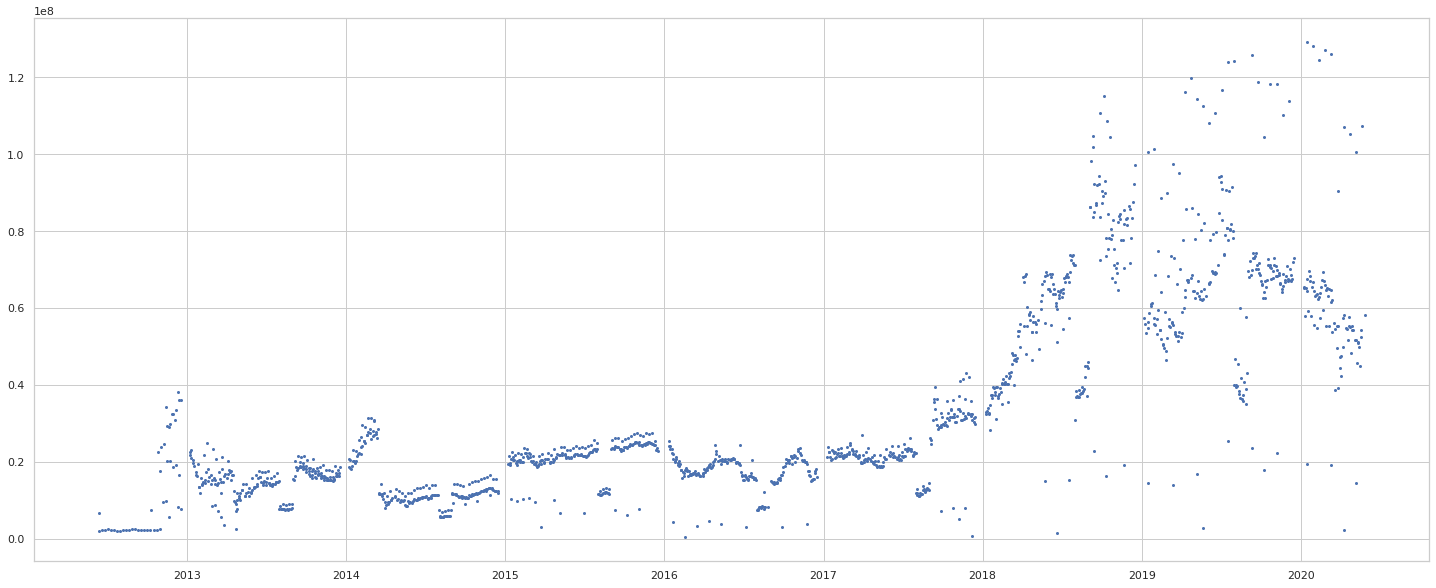

In [257]:
plt.figure(figsize=(25,10))
plt.scatter(df['Time'], df['Total Revenue €'], s=4)

This dataset seems to have different types of auctions

## Auction type study

### Column exploration

In [258]:
df.groupby('Contract')['Time'].count()

Contract
EAA2       1
EAA3      47
T2PA      64
T3PA    1492
Name: Time, dtype: int64

In [259]:
df.groupby('Country')['Time'].count()

Country
CZ       2
DE     396
EU    1078
HU       4
LT       3
NL       4
PL     112
XA       1
XF       4
Name: Time, dtype: int64

### Revenues over time in clusters

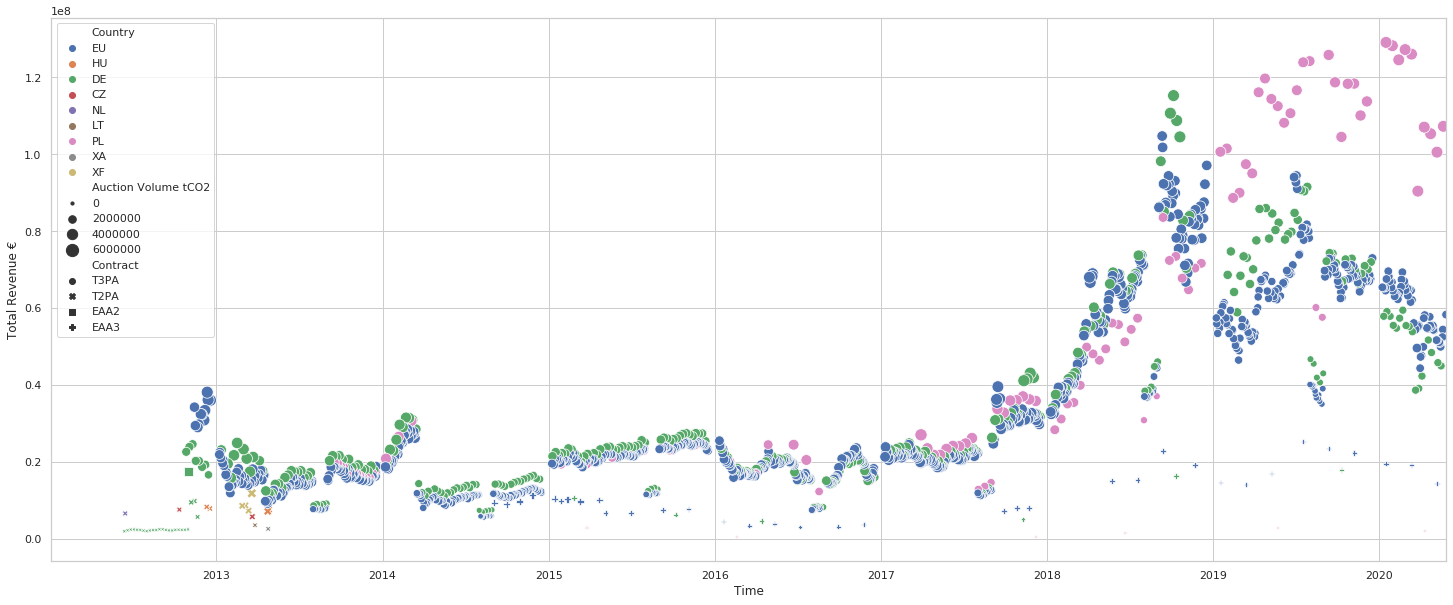

In [260]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Revenue €', hue='Country', style='Contract', size='Auction Volume tCO2', sizes=(10, 150), data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

### Price over time

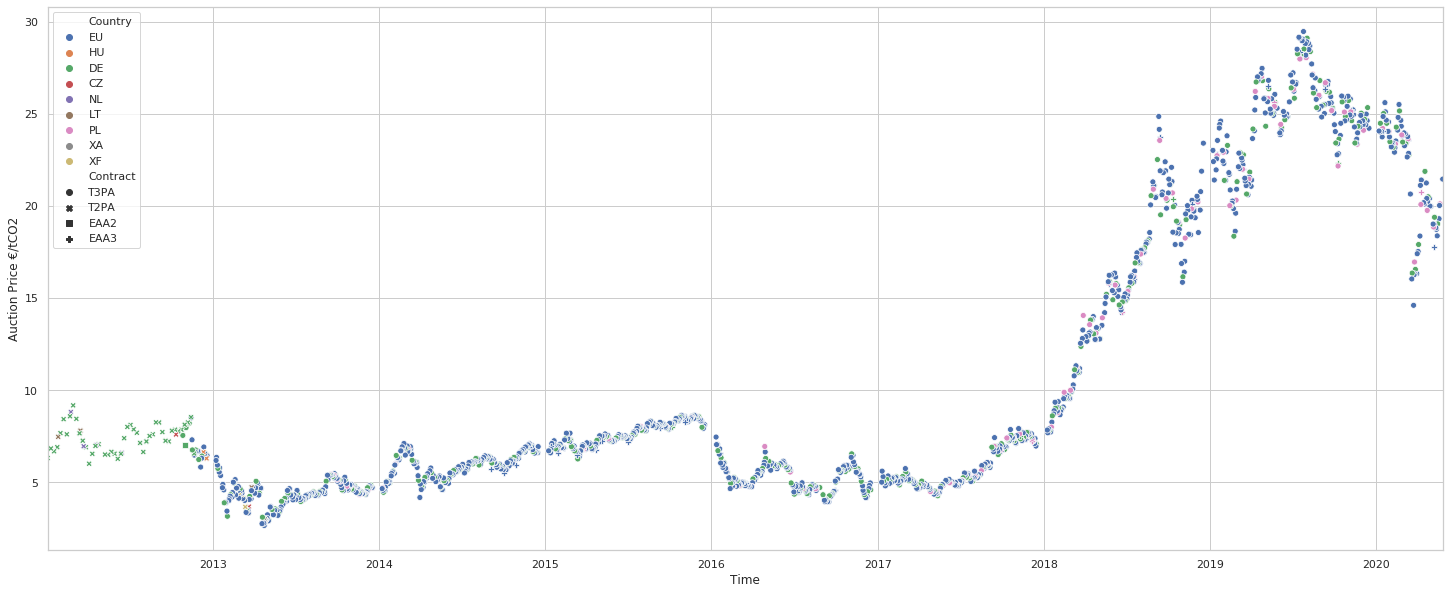

In [261]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Auction Price €/tCO2', hue='Country', style='Contract', data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

Count total CO2 volume auctionned in 2019 (should be 3 Gt according to https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)

Here, we do : total_volume / 45% (40% credits are auctionned) / 40% (40% GHGE in EU are covered by the ETS)

In [262]:
df[df['Date'].dt.year == 2019]['Auction Volume tCO2'].sum() * 100 / 45 * 100 / 45

2933543209.876543

### Number of bidders over time

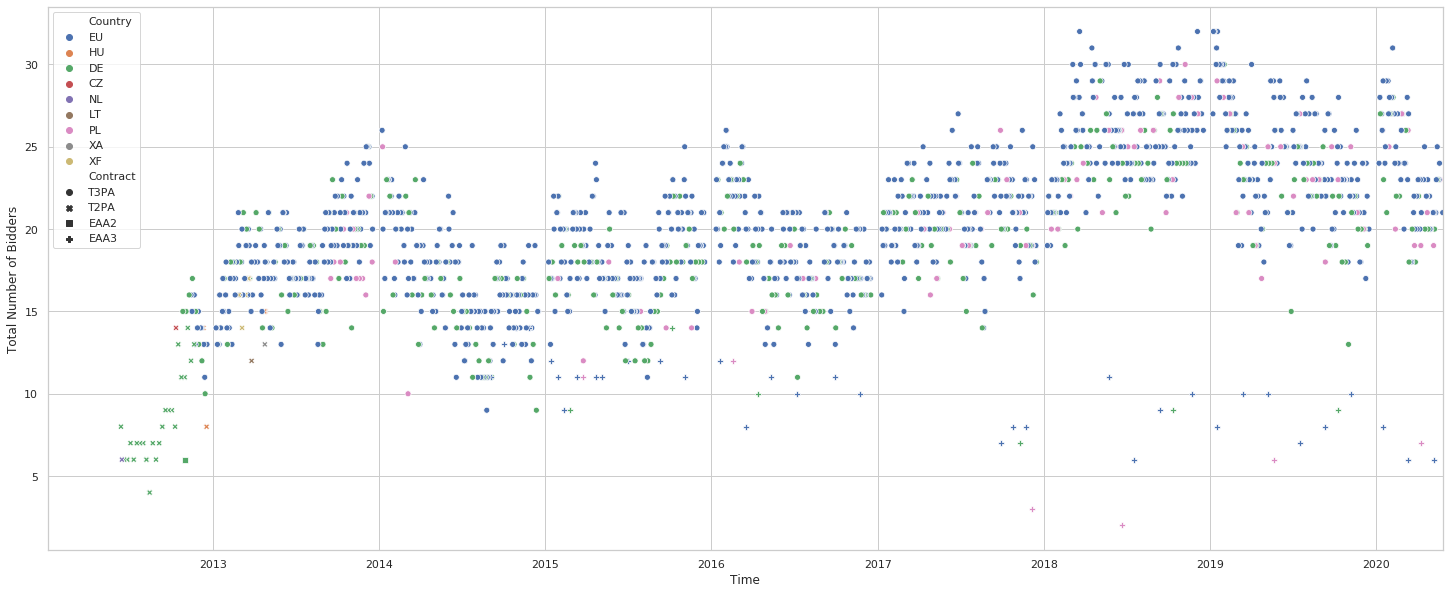

In [263]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Number of Bidders', hue='Country', style='Contract', data=df)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
plt.show()

### Amount of bids (volume)

Compare `Total Amount of Bids` with `Auction Volume tCO2`

My guess is that `Auction Volume tCO2` is the volume it tCO2 available during auction, while `Total Amount of Bids` is the total volume in tCO2 of submitted bids

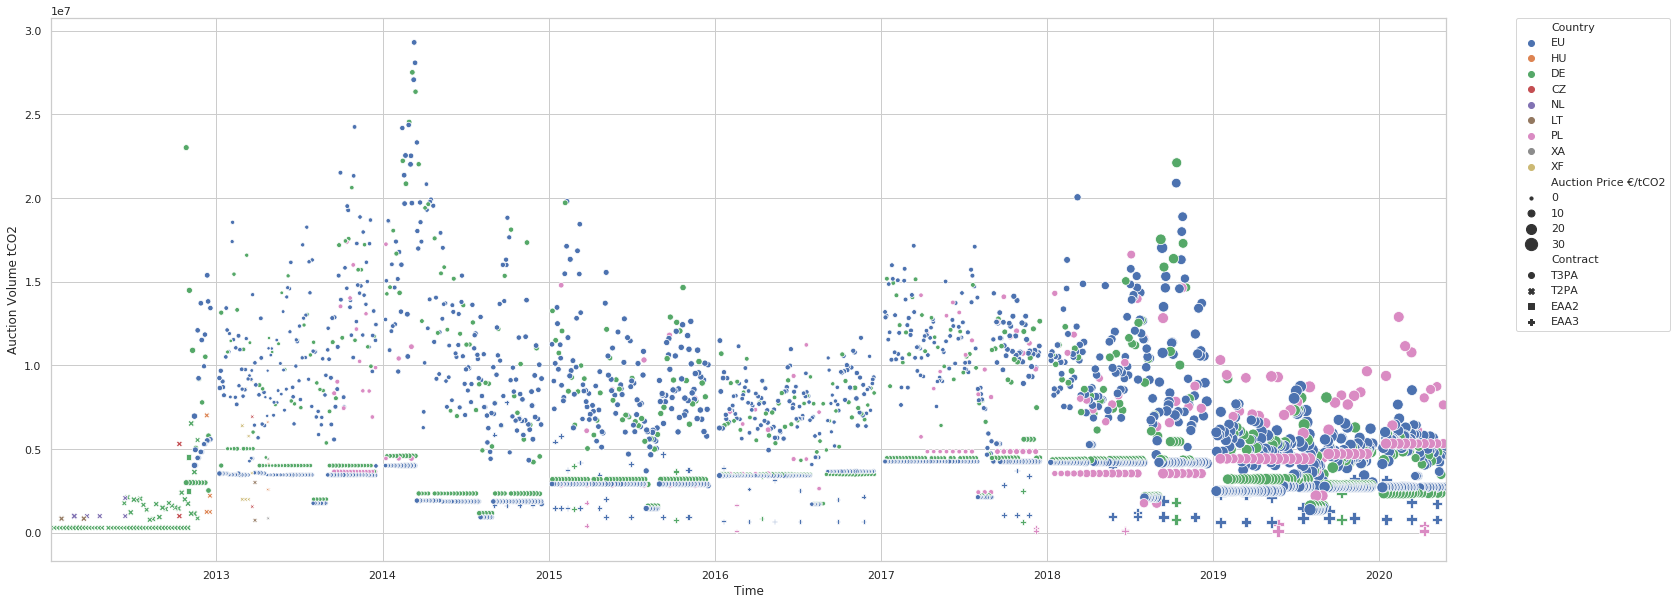

In [270]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(x='Time', y='Total Amount of Bids', hue='Country', style='Contract', size='Auction Price €/tCO2', sizes=(10, 150), data=df)
sns.scatterplot(x='Time', y='Auction Volume tCO2', hue='Country', style='Contract', size='Auction Price €/tCO2', sizes=(10, 150), data=df, ax=ax)
ax.set_xlim([df['Time'].min(), df['Time'].max()])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:20], labels[:20], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Bid analysis

/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alex

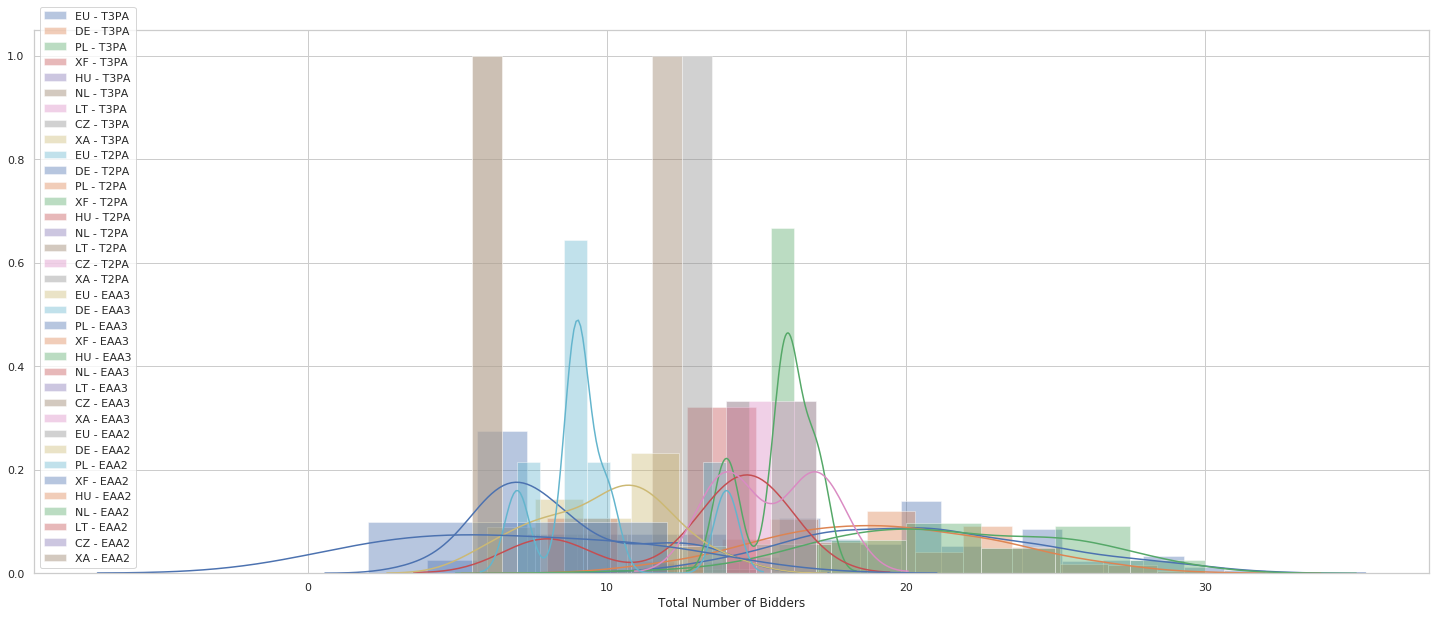

In [271]:
plt.figure(figsize=(25,10))
for contract in df['Contract'].value_counts().index:
    for country in df['Country'].value_counts().index:
        sns.distplot(
            df[(df['Country'] == country) & (df['Contract'] == contract)]['Total Number of Bidders'],
            kde=True,
            label='{} - {}'.format(country, contract)
        )

plt.legend()
plt.show()

/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alex

/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alexis/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/alex

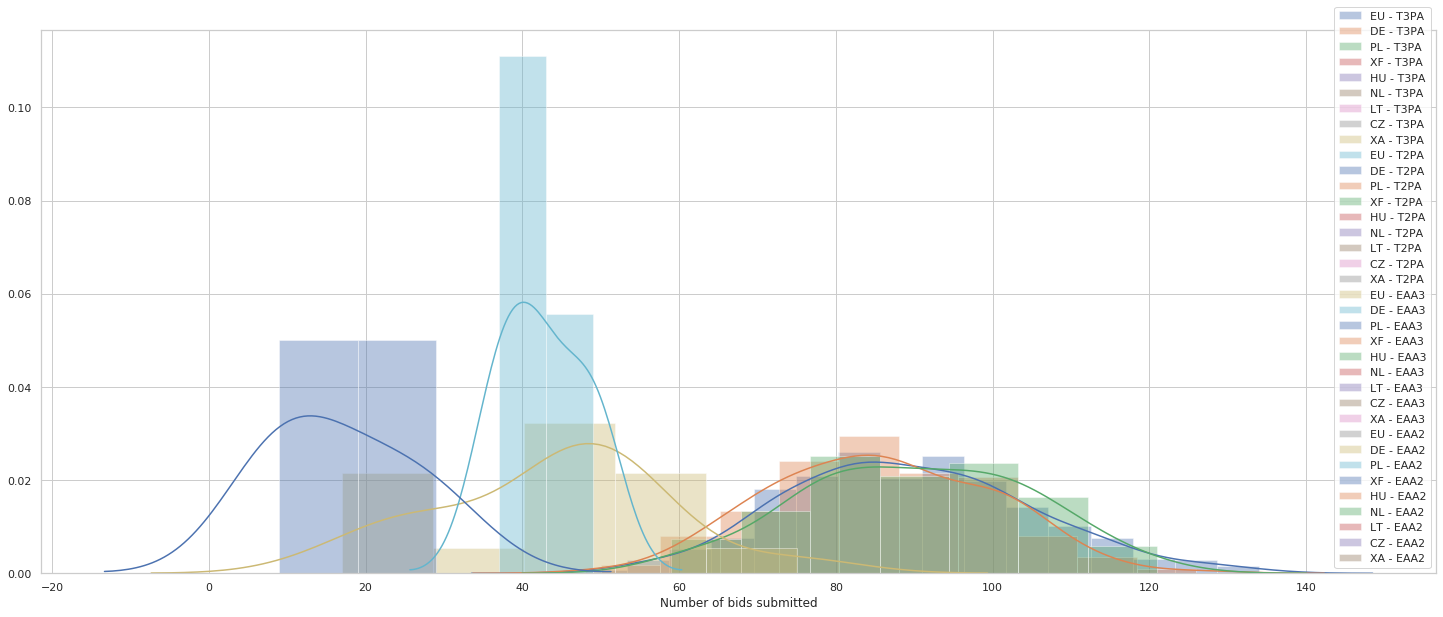

In [272]:
plt.figure(figsize=(25,10))
for contract in df['Contract'].value_counts().index:
    for country in df['Country'].value_counts().index:
        sns.distplot(
            df[(df['Country'] == country) & (df['Contract'] == contract)]['Number of bids submitted'],
            kde=True,
            label='{} - {}'.format(country, contract)
        )

plt.legend()
plt.show()